In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [10]:

kdd = pd.read_csv("kdd_FGM.csv")
nsl = pd.read_csv("nsl_FGM.csv")
ids = pd.read_csv("ids_FGM.csv")
ciciot = pd.read_csv("ciciot_FGM.csv")
kitsune = pd.read_csv("kitsune_FGM.csv")
credit = pd.read_csv("credit_FGM.csv")
ecg = pd.read_csv("ecg_FGM.csv")

in_kdd = kdd.loc[kdd['r1']==0.,'n1'].values[0]
in_ids = ids.loc[ids['r1']==0.,'n1'].values[0]
in_kitsune = kitsune.loc[kitsune['r1']==0.,'n1'].values[0]
in_ciciot = ciciot.loc[ciciot['r1']==0.,'n1'].values[0]
in_credit = credit.loc[credit['r1']==0.,'n1'].values[0]
in_ecg = ecg.loc[ecg['r1']==0.,'n1'].values[0]


kdd['ratio'] = kdd['n2']*(1-kdd['r2'])/in_kdd
ids['ratio'] = ids['n2']*(1-ids['r2'])/in_ids
ciciot['ratio'] = ciciot['n2']*(1-ciciot['r2'])/in_ciciot
kitsune['ratio'] = kitsune['n2']*(1-kitsune['r2'])/in_kitsune
credit['ratio'] = credit['n2']*(1-credit['r2'])/in_credit
nsl['ratio'] = nsl['n2']*(1-nsl['r2'])/in_kdd
ecg['ratio'] = ecg['n2']*(1-ecg['r2'])/in_ecg

kdd['name'] ='kdd'
nsl['name'] ='nsl'
credit['name'] ='credit'
ids['name'] = 'ids'
ciciot['name'] ='ciciot'
kitsune['name'] = 'kitsune'
ecg['name'] = 'ecg'
data = pd.concat([kdd, ids, ciciot,kitsune, credit, ecg], ignore_index=True)

In [11]:
ecg

,metric,n1,n2,r1,r2,ratio,name
0,sdc,1247,1063,0.000000,0.000000,0.852446,ecg
1,sdc,1334,1126,0.065217,0.063943,0.845229,ecg
2,sdc,1422,1223,0.123066,0.121832,0.861267,ecg
3,sdc,1509,1281,0.173625,0.179547,0.842823,ecg
4,sdc,1597,1288,0.219161,0.212733,0.813152,ecg
5,sdc,1684,1466,0.259501,0.260573,0.869286,ecg
6,sdc,1772,1441,0.296275,0.290076,0.820369,ecg
7,sdc,1859,1560,0.329209,0.321795,0.848436,ecg
8,sdc,1947,1689,0.359527,0.354056,0.874900,ecg
9,sdc,2034,1693,0.386922,0.391613,0.825982,ecg


In [12]:
#data = data[data['name']!='ids']
data = data[data['metric']=='sdc']
data.rename(columns={'name': 'dataset'}, inplace=True)
eps = 0.0000000000000001
data['improvement'] = 100*(data.r1-data.r2)/(data.r1+eps)
data['id'] = range(len(data))
data = data.sort_values(by=['dataset', 'r1'])
data.loc[data['dataset']=='kdd', 'id'] = range(11)
data.loc[data['dataset']=='ciciot', 'id'] = range(11)
data.loc[data['dataset']=='ids', 'id'] = range(11)
data.loc[data['dataset']=='kitsune', 'id'] = range(11)
data.loc[data['dataset']=='credit', 'id'] = range(11)
data.loc[data['dataset']=='ecg', 'id'] = range(11)
data.head(40)

,metric,n1,n2,r1,r2,ratio,dataset,improvement,id
22,sdc,127298,98690,0.000000,0.000000,0.775267,ciciot,0.000000,0
23,sdc,131650,102644,0.033057,0.026548,0.784922,ciciot,19.690871,1
24,sdc,136002,104325,0.063999,0.051100,0.777656,ciciot,20.155188,2
25,sdc,140354,107738,0.093022,0.074774,0.783060,ciciot,19.616817,3
26,sdc,144706,112033,0.120299,0.098328,0.793547,ciciot,18.263578,4
27,sdc,149058,113789,0.145983,0.117929,0.788465,ciciot,19.217689,5
28,sdc,153410,116463,0.170211,0.139658,0.787114,ciciot,17.949803,6
29,sdc,157762,120582,0.193101,0.160007,0.795676,ciciot,17.138027,7
30,sdc,162114,126453,0.214762,0.180628,0.813933,ciciot,15.893875,8
31,sdc,166466,126208,0.235291,0.197539,0.795590,ciciot,16.044923,9


In [13]:
df_1 = pd.read_csv("performances_kdd_AE.csv")
df_2 = pd.read_csv("performances_kdd_OC-SVM.csv")
df_3 = pd.read_csv("performances_kdd_LOF.csv")
df_4 = pd.read_csv("performances_kdd_IF.csv")
df_5 = pd.read_csv("performances_kdd_svdd.csv")
df_6 = pd.read_csv("performances_kdd_dsebm.csv")
df_7 = pd.read_csv("performances_kdd_alad.csv")
df_8 = pd.read_csv("performances_kdd_dagmm.csv")
df_kdd = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [14]:
df_1 = pd.read_csv("performances_kitsune_AE.csv")
df_2 = pd.read_csv("performances_kitsune_OC-SVM.csv")
df_3 = pd.read_csv("performances_kitsune_LOF.csv")
df_4 = pd.read_csv("performances_kitsune_IF.csv")
df_5 = pd.read_csv("performances_kitsune_svdd.csv")
df_6 = pd.read_csv("performances_kitsune_dsebm.csv")
df_7 = pd.read_csv("performances_kitsune_alad.csv")
df_8 = pd.read_csv("performances_kitsune_dagmm.csv")
df_kitsune = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7,df_8], axis=0, ignore_index=True)

In [15]:
df_1 = pd.read_csv("performances_ciciot_AE.csv")
df_2 = pd.read_csv("performances_ciciot_OC-SVM.csv")
df_3 = pd.read_csv("performances_ciciot_LOF.csv")
df_4 = pd.read_csv("performances_ciciot_IF.csv")
df_5 = pd.read_csv("performances_ciciot_svdd.csv")
df_6 = pd.read_csv("performances_ciciot_dsebm.csv")
df_7 = pd.read_csv("performances_ciciot_alad.csv")
df_8 = pd.read_csv("performances_ciciot_dagmm.csv")
df_ciciot = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [16]:
df_1 = pd.read_csv("performances_ids_AE.csv")
df_2 = pd.read_csv("performances_ids_OC-SVM.csv")
df_3 = pd.read_csv("performances_ids_LOF.csv")
df_4 = pd.read_csv("performances_ids_IF.csv")
df_5 = pd.read_csv("performances_ids_svdd.csv")
df_6 = pd.read_csv("performances_ids_dsebm.csv")
df_7 = pd.read_csv("performances_ids_alad.csv")
df_8 = pd.read_csv("performances_ids_dagmm.csv")
df_ids = pd.concat([df_1, df_2,  df_3, df_4, df_5, df_6, df_7,df_8], axis=0, ignore_index=True)

In [17]:
df_1 = pd.read_csv("performances_ecg_AE.csv")
df_2 = pd.read_csv("performances_ecg_OC-SVM.csv")
df_3 = pd.read_csv("performances_ecg_LOF.csv")
df_4 = pd.read_csv("performances_ecg_IF.csv")
df_5 = pd.read_csv("performances_ecg_svdd.csv")
df_6 = pd.read_csv("performances_ecg_dsebm.csv")
df_7 = pd.read_csv("performances_ecg_alad.csv")
df_8 = pd.read_csv("performances_ecg_dagmm.csv")
df_ecg = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [19]:
df_1 = pd.read_csv("performances_credit_AE.csv")
df_2 = pd.read_csv("performances_credit_OC-SVM.csv")
df_3 = pd.read_csv("performances_credit_LOF.csv")
df_4 = pd.read_csv("performances_credit_IF.csv")
df_5 = pd.read_csv("performances_credit_svdd.csv")
df_6 = pd.read_csv("performances_credit_dsebm.csv")
df_7 = pd.read_csv("performances_credit_alad.csv")
df_8 = pd.read_csv("performances_credit_dagmm.csv")
df_credit = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [20]:
df_perf = pd.concat([df_kdd, df_kitsune, df_ciciot, df_ecg, df_ids, df_credit], axis=0, ignore_index=True)
df_perf = df_perf.sort_values(by='dataset')

In [21]:
df_perf[df_perf["model"]=="Bopeto_svdd"].head()

,dataset,contamination,model,accuracy,precision,recall,f1,Unnamed: 0
482,ciciot,0.254774,Bopeto_svdd,0.540319,0.701072,0.538368,0.609041,NaN
462,ciciot,0.000000,Bopeto_svdd,0.643638,0.788447,0.634383,0.703074,NaN
464,ciciot,0.033057,Bopeto_svdd,0.537701,0.698988,0.535477,0.606404,NaN
466,ciciot,0.063999,Bopeto_svdd,0.499876,0.666018,0.497464,0.569532,NaN
468,ciciot,0.093022,Bopeto_svdd,0.565008,0.720626,0.564964,0.633371,NaN


In [22]:
sub_df = df_perf[['dataset', 'contamination']].copy()
sub_df['contamination'] = sub_df['contamination']*100
sub_df = sub_df.drop_duplicates().groupby("dataset")['contamination'].apply(lambda x: sorted(x)).to_dict()

keys = list(sub_df.keys())
for key in keys:
    sub_df[key] = np.diff(sub_df[key])
contaminations = {}
size = len(sub_df["kitsune"])
for i in range(size):
    contaminations[i] = [sub_df["ciciot"][i], sub_df["credit"][i], sub_df["ecg"][i], 
           sub_df["ids"][i], sub_df["kdd"][i], sub_df["kitsune"][i]]
 

/tmp/ipykernel_227970/785806113.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(keys, rotation=90)


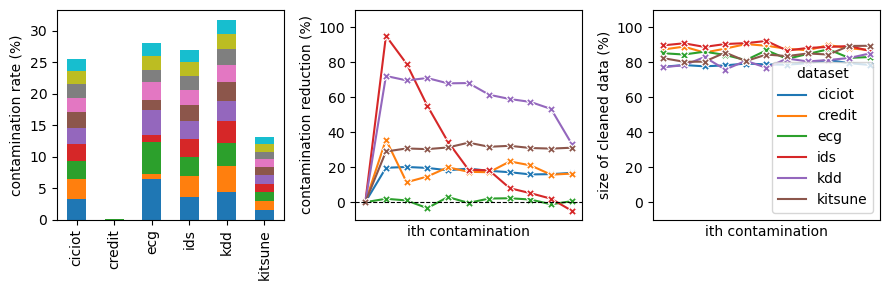

In [23]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3))
cond = data['dataset']=='ciciot'
width = 0.5
bottom = np.zeros(6) 
for boolean, weight_count in contaminations.items():
    p = ax[0].bar(keys, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[0].set_ylabel('contamination rate (%)')
ax[0].legend().remove()
ax[0].set_xticklabels(keys, rotation=90)


sns.lineplot(data=data, x=data.id, y=data.improvement, hue='dataset', ax=ax[1], marker='X')
#ax.set_title(f'{subplot}'.upper())
ax[1].set_xlabel('ith contamination') 
ax[2].set_ylabel('size of cleaned data (%)')
sns.lineplot(data=data, x=data.id, y=100*data.ratio, hue='dataset', ax=ax[2], marker='X')
ax[2].set_xlabel('ith contamination') 
ax[1].set_ylabel('contamination reduction (%)')
ax[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax[1].legend().remove()
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[1].set_ylim(-10, 110)
ax[2].set_ylim(-10, 110)
plt.tight_layout()
plt.savefig("cleaning_ratio.pdf")
plt.show()

/tmp/ipykernel_227970/491522319.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


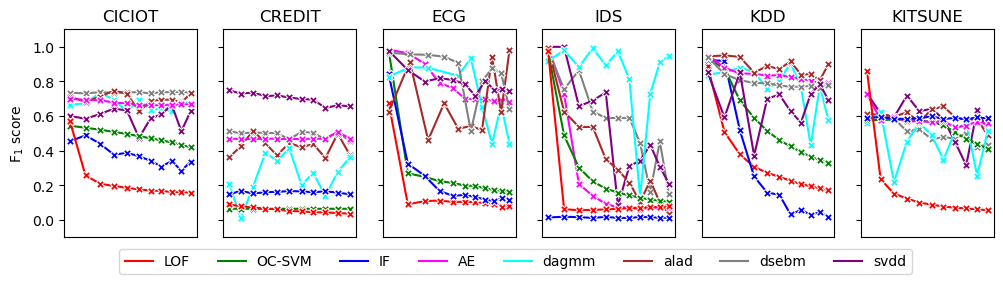

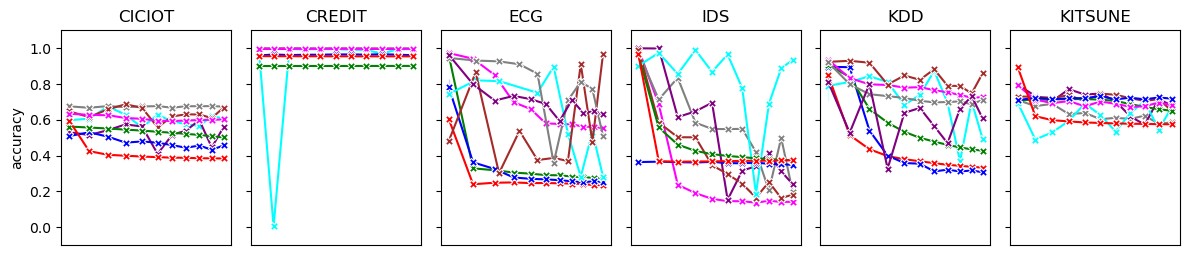

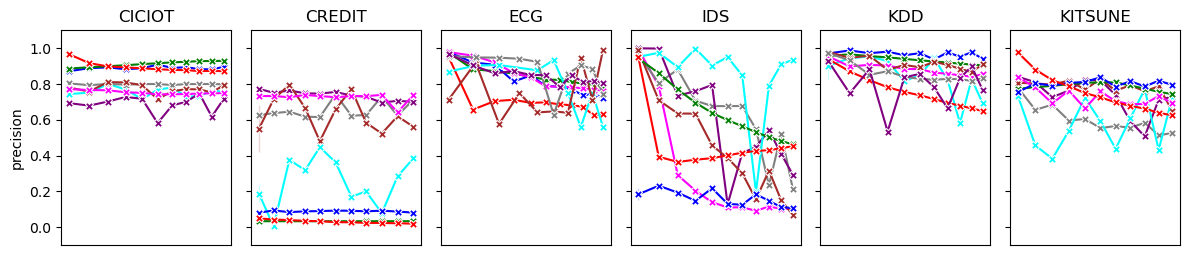

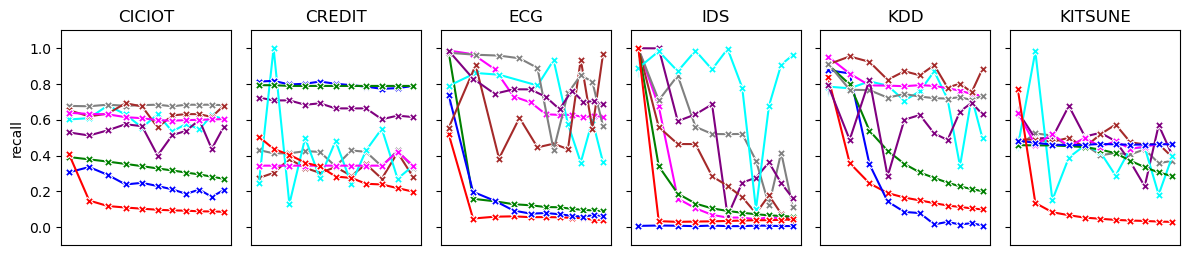

In [24]:
metrics = ["f1", "accuracy", "precision", "recall"]
color_palette_ = {
    "IF": "blue",
    "LOF": "red",
    "OC-SVM": "green",
    "AE": "magenta",
    "dsebm": "gray",
    "alad": "brown",
    "svdd": "purple",
    "dagmm": "cyan" 
}
for metric in metrics:
    degration = df_perf[~df_perf['model'].str.contains('Bopeto')]
    fig, axes = plt.subplots(ncols=6, figsize=(12, 2.7), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, degration.groupby('dataset'))):
        sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X', palette=color_palette_)
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('')
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'F$_1$ score')
        else:
            ax.set_ylabel(metric)
        ax.set_ylim(-0.1, 1.1)
        if i != 2 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
            ax.legend(loc='lower center', bbox_to_anchor=(1., -0.21), ncol=8)
            #ax.legend().get_frame().set_linewidth(1)
    plt.tight_layout()
    plt.savefig("degration_"+metric+".pdf")
    plt.show()

In [25]:
degration_perf = df_perf[~df_perf['model'].str.contains('Bopeto')]
degration_perf.groupby('dataset')['accuracy'].agg(['mean', 'std'])

,mean,std
dataset,,
ciciot,0.561744,0.087940
credit,0.964368,0.104106
ecg,0.553194,0.259302
ids,0.511593,0.284357
kdd,0.663395,0.200887
kitsune,0.681469,0.071228


In [26]:
df_perf[df_perf['contamination']==0].head(10)

,dataset,contamination,model,accuracy,precision,recall,f1,Unnamed: 0
485,ciciot,0.0,Bopeto_dsebm,0.675352,0.799129,0.683713,0.736929,NaN
484,ciciot,0.0,dsebm,0.674862,0.807073,0.671678,0.733177,NaN
483,ciciot,0.0,dsebm,0.675878,0.799773,0.683849,0.737282,NaN
462,ciciot,0.0,Bopeto_svdd,0.643638,0.788447,0.634383,0.703074,NaN
506,ciciot,0.0,alad,0.684577,0.805721,0.692766,0.744987,NaN
530,ciciot,0.0,dagmm,0.599973,0.746658,0.603169,0.667287,NaN
531,ciciot,0.0,Bopeto_dagmm,0.616495,0.758065,0.621803,0.683206,NaN
529,ciciot,0.0,dagmm,0.595663,0.741947,0.601096,0.664136,NaN
461,ciciot,0.0,svdd,0.529081,0.691702,0.526651,0.597997,NaN
507,ciciot,0.0,alad,0.610831,0.755218,0.613776,0.677190,NaN


In [27]:
def sort_group(group):
    return group.sort_values(by='dataset')

In [28]:
df_perf.head()

,dataset,contamination,model,accuracy,precision,recall,f1,Unnamed: 0
546,ciciot,0.214762,dagmm,0.565927,0.732020,0.547894,0.626713,NaN
485,ciciot,0.000000,Bopeto_dsebm,0.675352,0.799129,0.683713,0.736929,NaN
486,ciciot,0.033057,dsebm,0.667596,0.793721,0.675832,0.730048,NaN
487,ciciot,0.033057,Bopeto_dsebm,0.676101,0.799960,0.684031,0.737467,NaN
488,ciciot,0.063999,dsebm,0.676694,0.800257,0.684795,0.738037,NaN


In [29]:
models = ["AE", "OC-SVM", "LOF", "IF", "svdd", "alad", "dsebm", "dagmm"]
names = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KITSUNE"]

In [30]:
def get_diff(model, dataset):
    n_db = pd.DataFrame([])
    ds = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]==model)]
    ds_b = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]=="Bopeto_"+model)]
    contamination = np.unique(ds["contamination"].values)
    diff_acc = []
    diff_f1 = []
    diff_prec = []
    diff_rec = []
    for c in contamination:
        acc = ds_b.loc[ds_b['contamination']==c, "accuracy"].values[0]
        acc -= ds.loc[ds['contamination']==c, "accuracy"].values[0]
        diff_acc.append(acc)
        f1 = ds_b.loc[ds_b['contamination']==c, "f1"].values[0]
        f1 -= ds.loc[ds['contamination']==c, "f1"].values[0]
        diff_f1.append(f1)
        prec = ds_b.loc[ds_b['contamination']==c, "precision"].values[0]
        prec -= ds.loc[ds['contamination']==c, "precision"].values[0]
        diff_prec.append(prec)
        rec = ds_b.loc[ds_b['contamination']==c, "recall"].values[0]
        rec -= ds.loc[ds['contamination']==c, "recall"].values[0]
        diff_rec.append(rec)
    n_db["accuracy"] = diff_acc
    n_db["precision"] = diff_prec
    n_db["f1"] = diff_f1
    n_db["recall"] = diff_rec
    n_db["contamination"] = contamination
    n_db["dataset"]=dataset
    n_db["model"] = model
    n_db["id"]=range(len(contamination))
    return n_db
    

In [31]:
get_diff("svdd", "ecg")

,accuracy,precision,f1,recall,contamination,dataset,model,id
0,-0.009052,-0.001522,-0.005866,-0.010267,0.000000,ecg,svdd,0
1,-0.058040,-0.033715,-0.040447,-0.045859,0.065217,ecg,svdd,1
2,0.160277,0.072715,0.114667,0.149213,0.123066,ecg,svdd,2
3,-0.105964,-0.062939,-0.077876,-0.088296,0.173625,ecg,svdd,3
4,-0.031416,-0.012334,-0.024219,-0.033539,0.219161,ecg,svdd,4
5,0.020234,0.004973,0.016647,0.025325,0.259501,ecg,svdd,5
6,0.075080,0.042766,0.057072,0.067077,0.296275,ecg,svdd,6
7,-0.107029,-0.057612,-0.080883,-0.097878,0.329209,ecg,svdd,7
8,-0.024494,-0.013025,-0.019040,-0.023272,0.359527,ecg,svdd,8
9,-0.029819,-0.018465,-0.022168,-0.024641,0.386922,ecg,svdd,9


In [32]:
difference = pd.DataFrame([])
for d_name in names:
    for m_name in models:
        difference = pd.concat([difference, get_diff(m_name, d_name.lower())], ignore_index=True)

/tmp/ipykernel_227970/3773657058.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


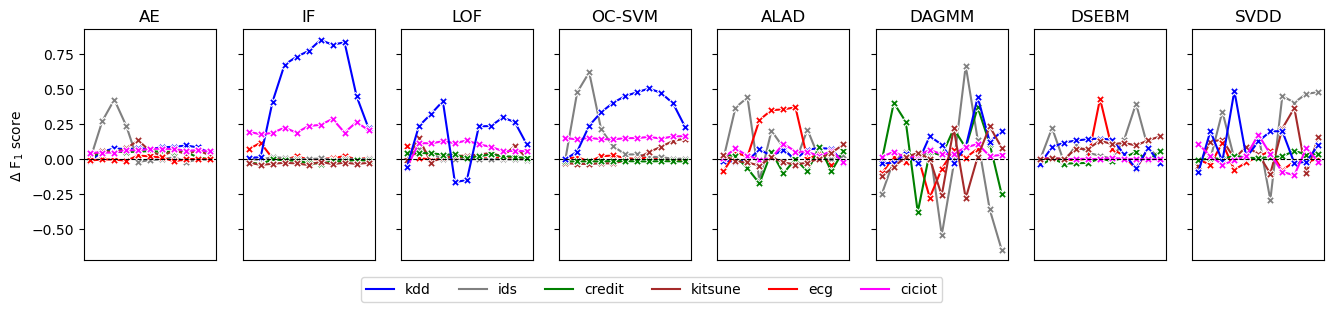

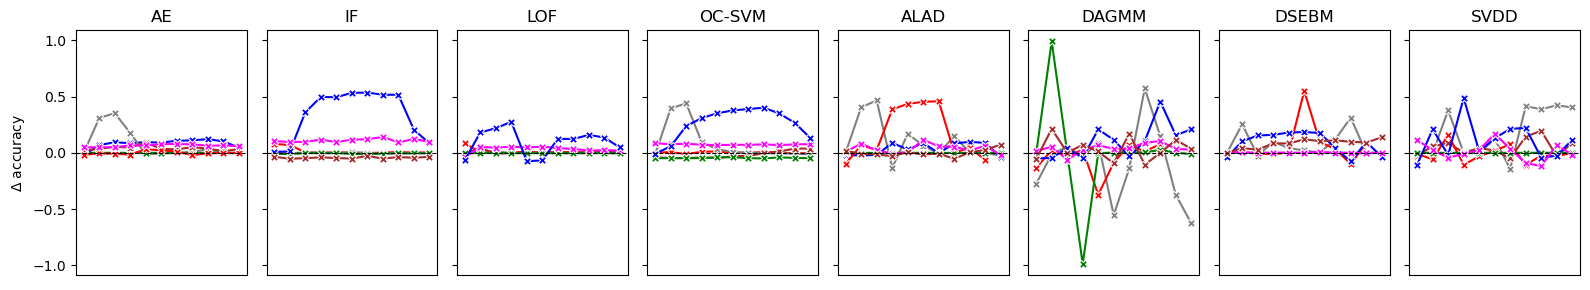

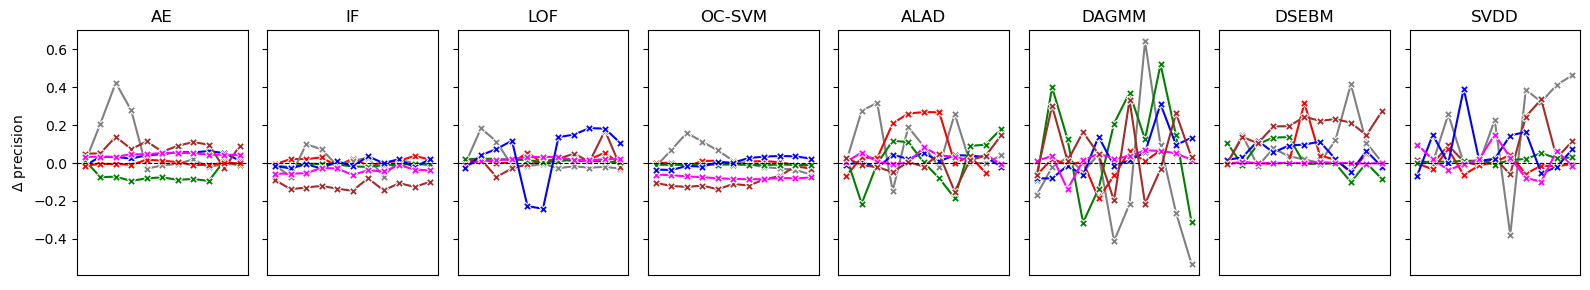

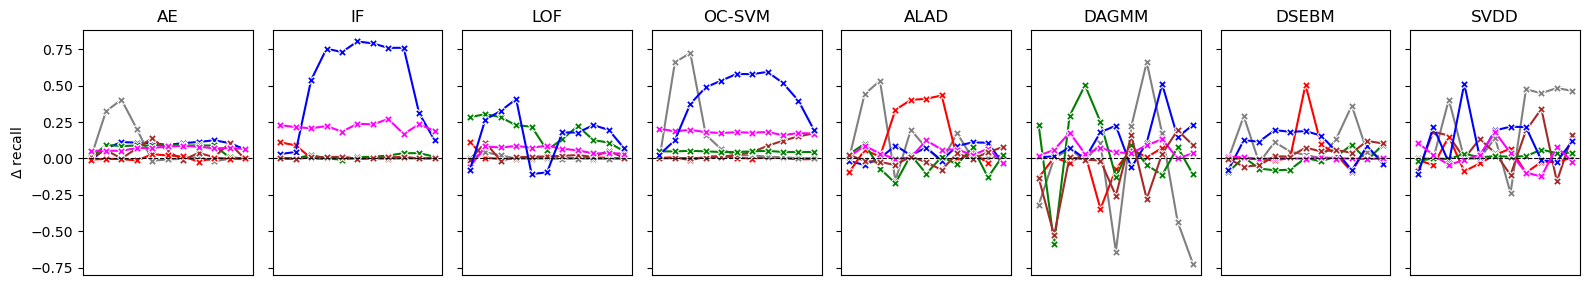

In [33]:
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'x', '+', '*']
color_palette = {
    "kdd": "blue",
    "ecg": "red",
    "credit": "green",
    "ciciot": "magenta",
    "ids": "gray",
    "kitsune": "brown"  
}
for metric in metrics:
    robustness = difference.sort_values(by='contamination')
    fig, axes = plt.subplots(ncols=8, figsize=(16, 3), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('model'))):
        sns.lineplot(data=df_group, x=df_group.id, y=metric, hue='dataset', ax=ax, marker='X', palette=color_palette)
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'$\Delta$ F$_1$ score')
        else:    
            ax.set_ylabel(r'$\Delta$ {}'.format(metric))

        if i != 0 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
                ax.legend(loc='lower center', bbox_to_anchor=(4.3, -0.21), ncol=6)
    plt.tight_layout()
    plt.savefig(metric+"_difference.pdf")
    plt.show()

In [34]:
def swap_prefix(name):
    if '_' in name:
        parts = name.split('_')
        return f"{parts[1]}_{parts[0]}"
    else:
        return name

In [35]:
def get_detail_summary(df_perf, metric):
    grouped_perf = df_perf.groupby(['model', 'dataset']).agg({metric: ['mean', 'std']})
    grouped_perf.columns = ['_'.join(col).strip() for col in grouped_perf.columns.values]
    grouped_perf[metric+'_mean'] = grouped_perf[metric+'_mean'].round(3)
    grouped_perf[metric+'_std'] = grouped_perf[metric+'_std'].round(3)
    grouped_perf[metric] = grouped_perf[metric+'_mean'].astype(str) + ' ± ' + grouped_perf[metric+'_std'].astype(str)
    pivot_df = grouped_perf.reset_index().pivot(index='model', columns='dataset', values=metric)
    pivot_df.rename(index=lambda x: swap_prefix(x), inplace=True)
    pivot_df.sort_index(inplace=True)
    return pivot_df

In [36]:
def remove_sign(value):
    if isinstance(value, str):
        parts = value.split(' ± ')
        if len(parts) > 1:
            return float(parts[0])  # Convert the value to float
    return value

In [37]:
def get_general_summary(df):
    data = df.applymap(remove_sign)
    df_basic = data[~data.index.str.contains('Bopeto')] 
    df_basic.sort_index(inplace=True)
    df_bopeto = data[data.index.str.contains('Bopeto')] 
    df_bopeto.sort_index(inplace=True)
    diff = df_bopeto.values - df_basic.values
    return pd.DataFrame(data=diff, index=df_basic.index, columns=df_basic.columns)

In [38]:
def get_latex(df, metric):
    return df.to_latex(index=False, 
                          caption='Example Table', 
                          label='tab:summary_'+metric, 
                          column_format='|c|c|c|c|c|c|c|')

In [39]:
f1_df = get_detail_summary(df_perf, "f1")
f1_df

dataset,ciciot,credit,ecg,ids,kdd,kitsune
model,,,,,,
AE,0.677 ± 0.015,0.472 ± 0.012,0.794 ± 0.126,0.298 ± 0.376,0.847 ± 0.056,0.592 ± 0.064
AE_Bopeto,0.734 ± 0.006,0.511 ± 0.02,0.778 ± 0.114,0.314 ± 0.384,0.903 ± 0.03,0.634 ± 0.052
IF,0.382 ± 0.064,0.158 ± 0.008,0.276 ± 0.272,0.015 ± 0.003,0.335 ± 0.379,0.588 ± 0.007
IF_Bopeto,0.592 ± 0.043,0.142 ± 0.008,0.242 ± 0.23,0.015 ± 0.006,0.806 ± 0.226,0.555 ± 0.004
LOF,0.249 ± 0.154,0.06 ± 0.019,0.193 ± 0.225,0.218 ± 0.353,0.373 ± 0.258,0.23 ± 0.299
LOF_Bopeto,0.3 ± 0.086,0.083 ± 0.029,0.162 ± 0.2,0.158 ± 0.271,0.482 ± 0.25,0.205 ± 0.231
OC-SVM,0.488 ± 0.043,0.065 ± 0.0,0.333 ± 0.303,0.325 ± 0.32,0.571 ± 0.231,0.533 ± 0.062
OC-SVM_Bopeto,0.633 ± 0.036,0.048 ± 0.001,0.278 ± 0.236,0.401 ± 0.364,0.86 ± 0.115,0.551 ± 0.007
alad,0.7 ± 0.035,0.418 ± 0.055,0.68 ± 0.193,0.418 ± 0.327,0.891 ± 0.049,0.595 ± 0.043


In [40]:
#print(get_latex(f1_df, "f1"))

In [41]:
gen = get_general_summary(f1_df)
gen.stack().mean(), gen.stack().std()

(0.04477083333333334, 0.09395477399652233)

In [42]:
prec_df = get_detail_summary(df_perf, "precision")
prec_df

dataset,ciciot,credit,ecg,ids,kdd,kitsune
model,,,,,,
AE,0.754 ± 0.011,0.726 ± 0.027,0.85 ± 0.087,0.338 ± 0.363,0.888 ± 0.038,0.737 ± 0.059
AE_Bopeto,0.797 ± 0.004,0.665 ± 0.034,0.836 ± 0.077,0.355 ± 0.376,0.918 ± 0.021,0.804 ± 0.045
IF,0.887 ± 0.011,0.088 ± 0.005,0.833 ± 0.092,0.164 ± 0.044,0.967 ± 0.016,0.797 ± 0.025
IF_Bopeto,0.849 ± 0.013,0.078 ± 0.005,0.832 ± 0.082,0.163 ± 0.057,0.963 ± 0.009,0.681 ± 0.014
LOF,0.899 ± 0.034,0.033 ± 0.01,0.722 ± 0.11,0.499 ± 0.212,0.771 ± 0.102,0.768 ± 0.123
LOF_Bopeto,0.911 ± 0.02,0.046 ± 0.016,0.718 ± 0.086,0.471 ± 0.169,0.801 ± 0.15,0.762 ± 0.101
OC-SVM,0.911 ± 0.016,0.034 ± 0.0,0.853 ± 0.065,0.666 ± 0.176,0.936 ± 0.021,0.784 ± 0.021
OC-SVM_Bopeto,0.837 ± 0.01,0.025 ± 0.001,0.842 ± 0.056,0.663 ± 0.205,0.939 ± 0.011,0.691 ± 0.025
alad,0.775 ± 0.029,0.623 ± 0.114,0.754 ± 0.147,0.483 ± 0.311,0.92 ± 0.038,0.782 ± 0.048


In [43]:
gen = get_general_summary(prec_df)
gen.stack().mean(), gen.stack().std()

(0.012958333333333336, 0.05210870729433351)

In [44]:
rec_df = get_detail_summary(df_perf, "recall")
rec_df

dataset,ciciot,credit,ecg,ids,kdd,kitsune
model,,,,,,
AE,0.614 ± 0.017,0.351 ± 0.022,0.749 ± 0.159,0.277 ± 0.381,0.811 ± 0.073,0.497 ± 0.071
AE_Bopeto,0.681 ± 0.007,0.417 ± 0.035,0.73 ± 0.144,0.292 ± 0.386,0.888 ± 0.039,0.526 ± 0.068
IF,0.245 ± 0.053,0.798 ± 0.015,0.2 ± 0.257,0.008 ± 0.001,0.281 ± 0.368,0.467 ± 0.011
IF_Bopeto,0.457 ± 0.055,0.81 ± 0.007,0.166 ± 0.218,0.008 ± 0.003,0.739 ± 0.258,0.468 ± 0.003
LOF,0.154 ± 0.119,0.334 ± 0.109,0.131 ± 0.183,0.197 ± 0.375,0.28 ± 0.271,0.175 ± 0.279
LOF_Bopeto,0.183 ± 0.065,0.502 ± 0.183,0.108 ± 0.174,0.129 ± 0.289,0.372 ± 0.237,0.142 ± 0.213
OC-SVM,0.335 ± 0.042,0.79 ± 0.002,0.26 ± 0.337,0.267 ± 0.351,0.451 ± 0.273,0.406 ± 0.065
OC-SVM_Bopeto,0.511 ± 0.05,0.838 ± 0.004,0.198 ± 0.262,0.352 ± 0.403,0.81 ± 0.167,0.458 ± 0.001
alad,0.639 ± 0.039,0.318 ± 0.047,0.626 ± 0.225,0.377 ± 0.336,0.864 ± 0.063,0.482 ± 0.044


In [45]:
gen = get_general_summary(rec_df)
gen.stack().mean(), gen.stack().std()

(0.05314583333333334, 0.10061999073474909)

In [46]:
acc_df = get_detail_summary(df_perf, "accuracy")
acc_df

dataset,ciciot,credit,ecg,ids,kdd,kitsune
model,,,,,,
AE,0.61 ± 0.016,0.997 ± 0.0,0.709 ± 0.175,0.344 ± 0.341,0.797 ± 0.072,0.707 ± 0.041
AE_Bopeto,0.672 ± 0.007,0.997 ± 0.0,0.684 ± 0.157,0.362 ± 0.344,0.867 ± 0.039,0.741 ± 0.03
IF,0.477 ± 0.03,0.963 ± 0.003,0.363 ± 0.201,0.36 ± 0.006,0.492 ± 0.251,0.719 ± 0.007
IF_Bopeto,0.584 ± 0.025,0.957 ± 0.003,0.336 ± 0.169,0.359 ± 0.007,0.798 ± 0.173,0.677 ± 0.006
LOF,0.428 ± 0.079,0.955 ± 0.0,0.304 ± 0.142,0.47 ± 0.232,0.46 ± 0.189,0.637 ± 0.12
LOF_Bopeto,0.445 ± 0.043,0.953 ± 0.001,0.287 ± 0.135,0.426 ± 0.179,0.52 ± 0.162,0.621 ± 0.091
OC-SVM,0.536 ± 0.021,0.901 ± 0.0,0.406 ± 0.262,0.507 ± 0.219,0.598 ± 0.186,0.697 ± 0.024
OC-SVM_Bopeto,0.608 ± 0.023,0.856 ± 0.004,0.357 ± 0.203,0.55 ± 0.251,0.831 ± 0.108,0.678 ± 0.01
alad,0.637 ± 0.038,0.996 ± 0.0,0.567 ± 0.25,0.435 ± 0.295,0.853 ± 0.064,0.719 ± 0.027


In [47]:
gen = get_general_summary(acc_df)
gen.stack().mean(), gen.stack().std()

(0.0319375, 0.0730276561573065)

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


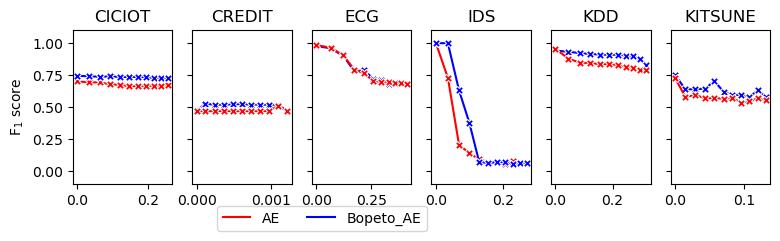

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


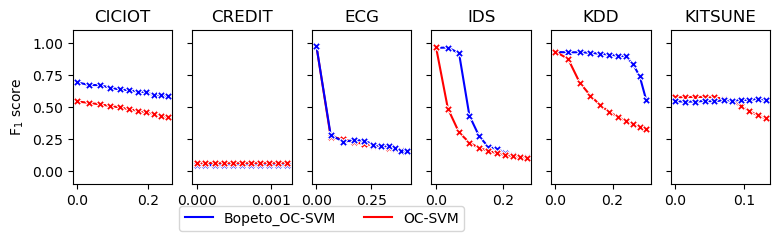

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


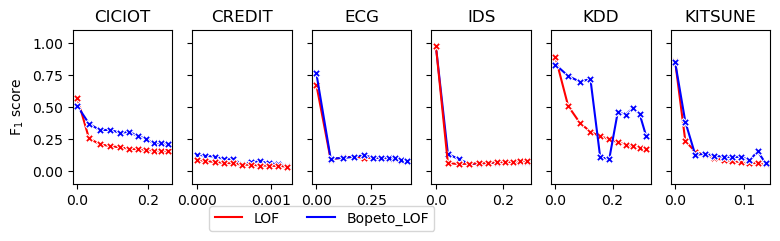

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


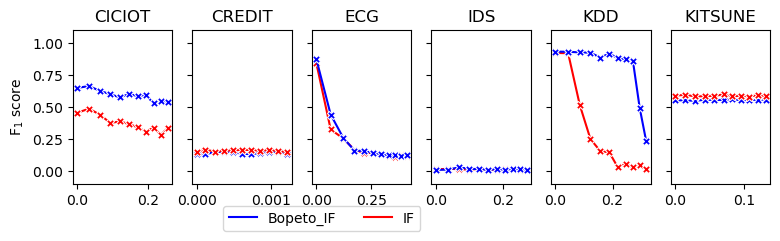

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


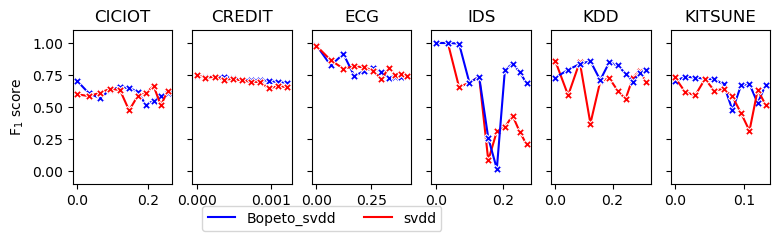

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


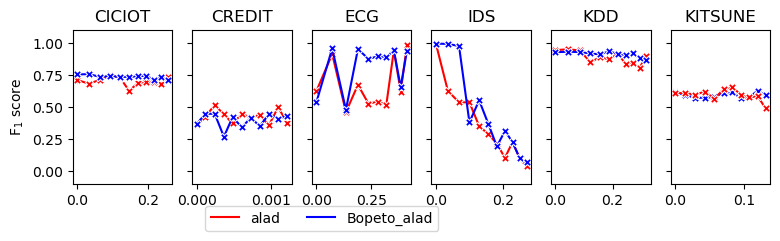

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


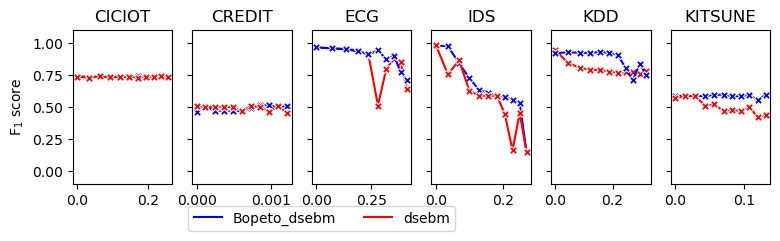

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


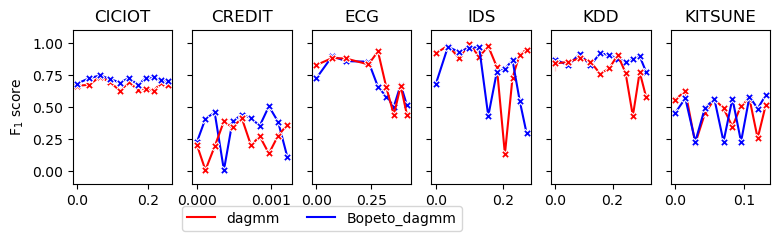

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


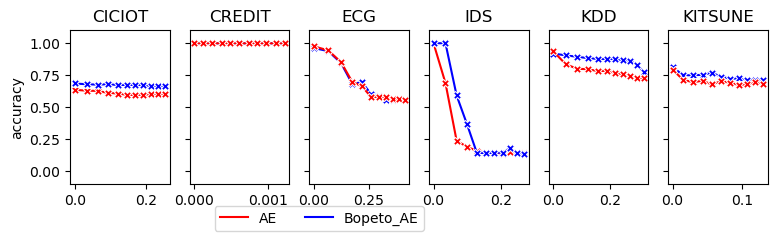

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


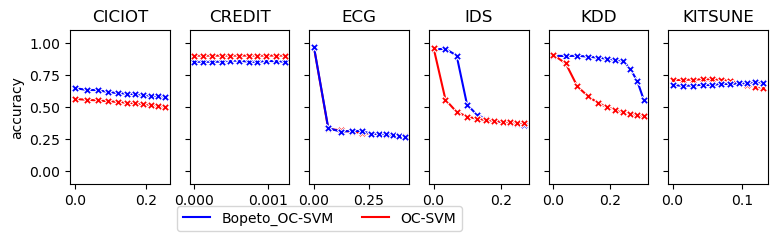

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


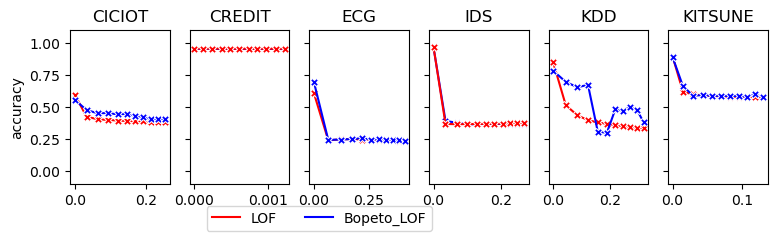

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


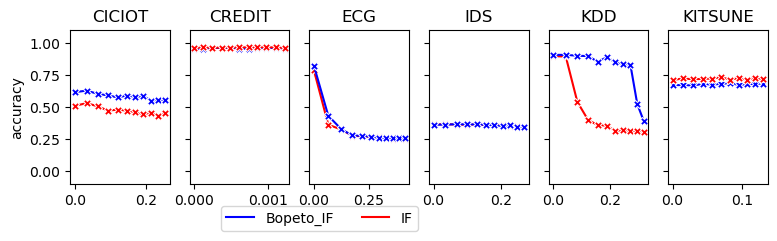

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


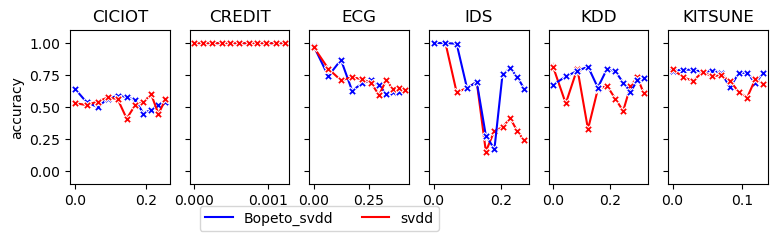

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


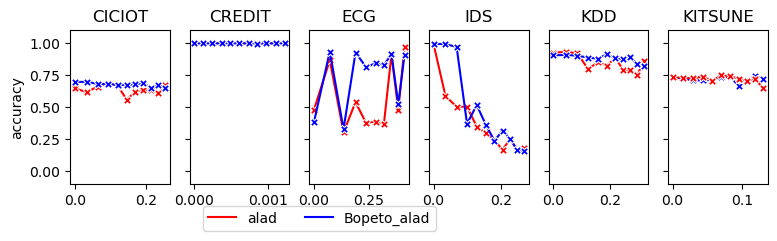

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


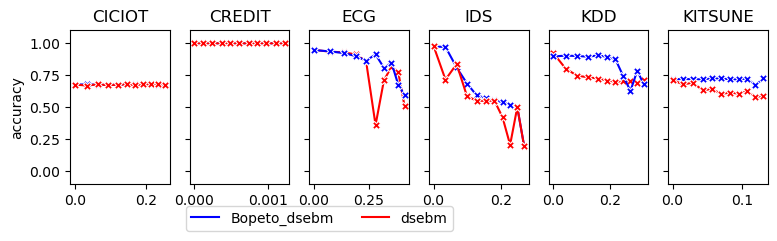

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


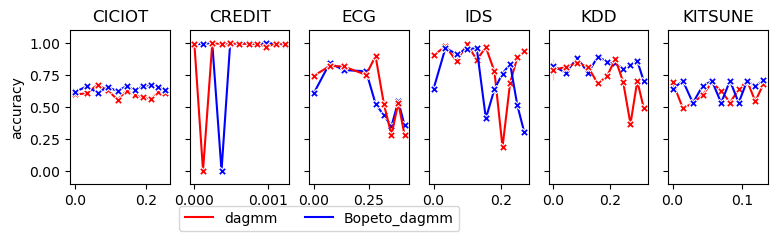

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


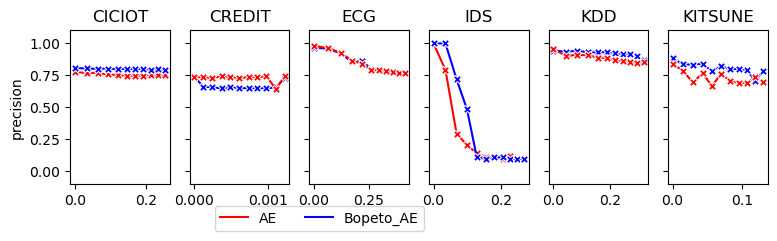

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


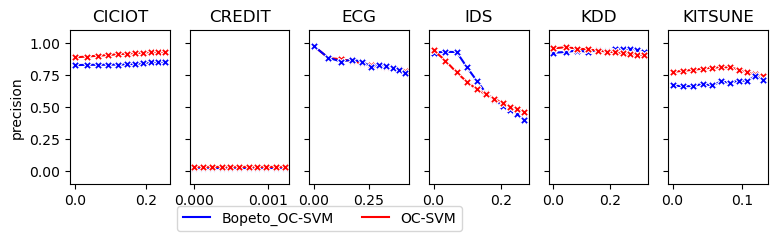

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


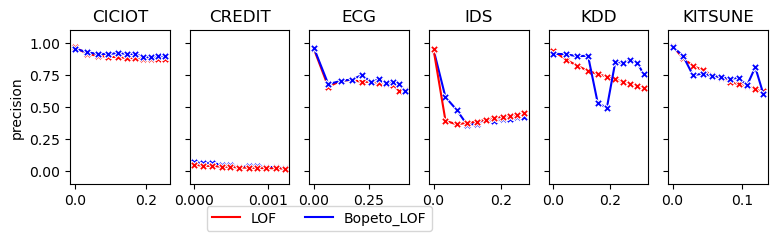

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


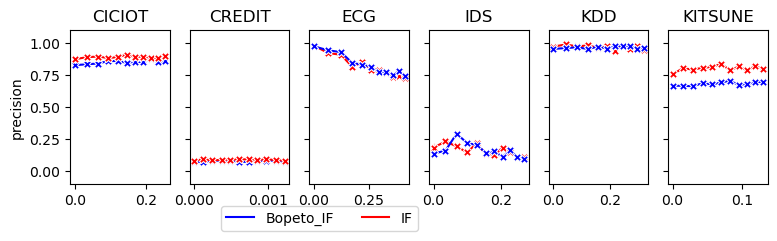

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


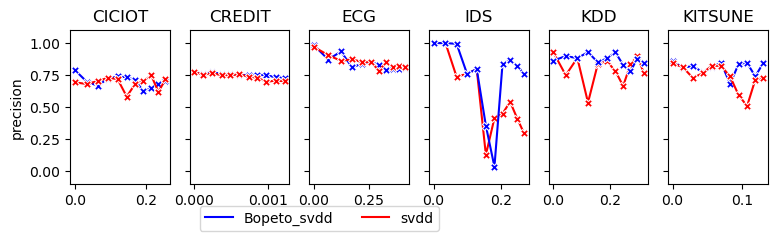

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


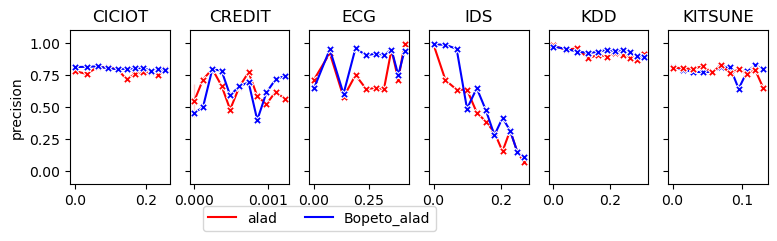

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


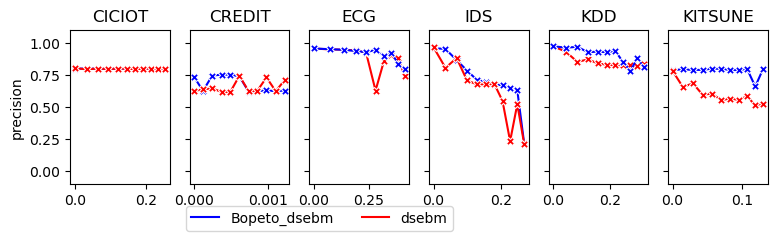

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


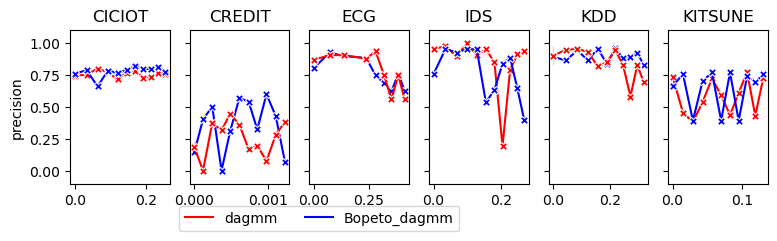

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


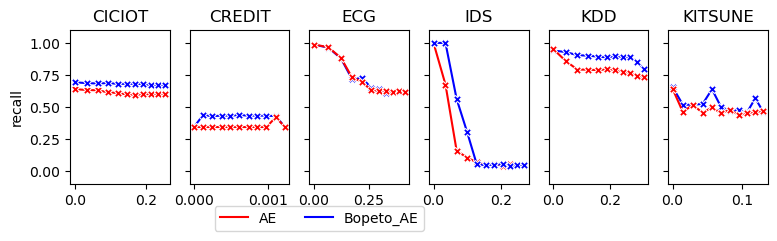

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


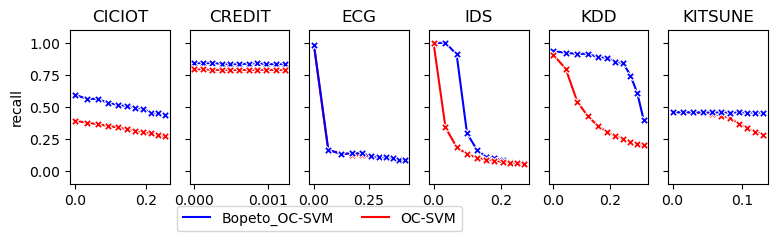

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


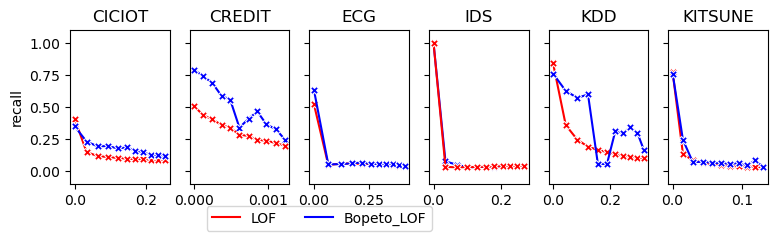

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


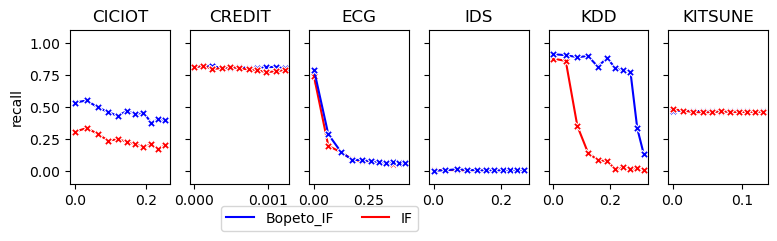

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


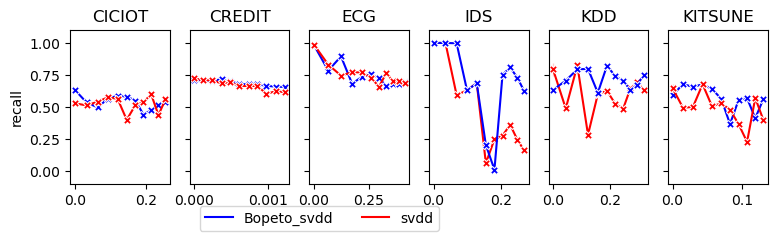

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


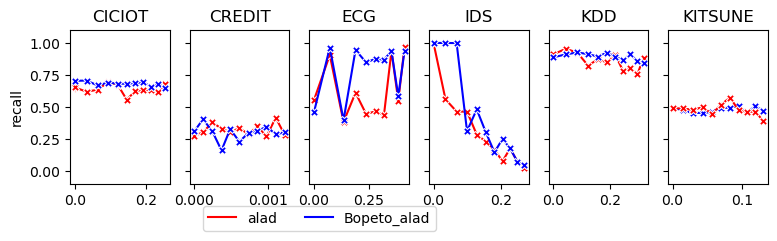

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


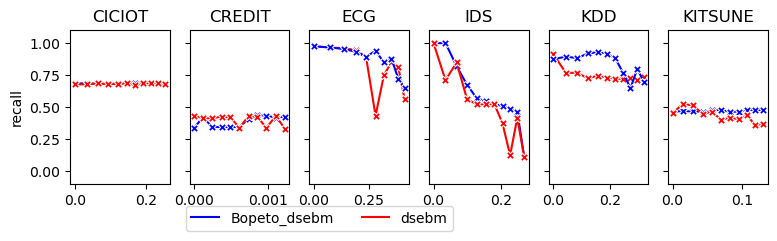

/tmp/ipykernel_227970/3230820549.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


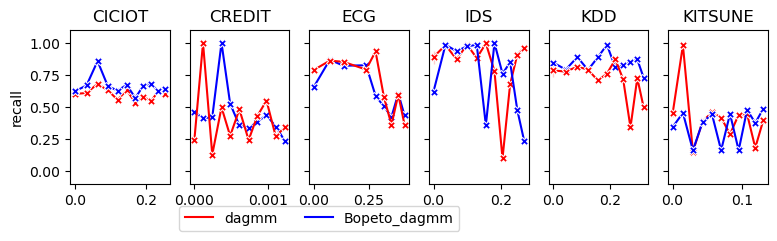

In [48]:
for metric in metrics:
    for model in models:
        palette ={'Bopeto_'+model: 'blue', model: 'red'}
        robustness = df_perf[df_perf['model'].str.contains(model)]
        robustness = robustness.sort_values(by='dataset')
        fig, axes = plt.subplots(ncols=6, figsize=(9, 2), sharey=True)
        for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('dataset'))):
            sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X', palette=palette)
            ax.set_title(f'{subplot}'.upper())
            ax.set_xlabel('')
            if metric=="f1":
                ax.set_ylabel(r'F$_1$ score')
            else:
                ax.set_ylabel(metric)
            ax.set_ylim(-0.1, 1.1)

            if i != 0:
                ax.legend().remove()
            else:
                ax.legend(loc='lower center', bbox_to_anchor=(2.5, -0.35), ncol=2)
        plt.tight_layout()
        plt.savefig(model+"_"+metric+"_robustness.pdf")
        plt.show()

In [49]:
df_group

,dataset,contamination,model,accuracy,precision,recall,f1,Unnamed: 0
360,kitsune,0.095550,dagmm,0.637655,0.608923,0.440268,0.511040,NaN
361,kitsune,0.095550,Bopeto_dagmm,0.532159,0.393614,0.162392,0.229924,NaN
362,kitsune,0.107730,dagmm,0.705309,0.772621,0.446095,0.565616,NaN
345,kitsune,0.000000,dagmm,0.689971,0.744325,0.425206,0.541228,NaN
364,kitsune,0.119587,dagmm,0.545150,0.431820,0.182337,0.256406,NaN
365,kitsune,0.119587,Bopeto_dagmm,0.660530,0.694617,0.376000,0.487898,NaN
346,kitsune,0.000000,dagmm,0.697702,0.726137,0.477039,0.575802,NaN
359,kitsune,0.083032,Bopeto_dagmm,0.705097,0.770847,0.447285,0.566094,NaN
363,kitsune,0.107730,Bopeto_dagmm,0.703615,0.740247,0.478926,0.581581,NaN
358,kitsune,0.083032,dagmm,0.534718,0.437820,0.288095,0.347516,NaN


In [50]:
dd_ecg = np.load("../data/ecg.npz", allow_pickle=True) 
dd_credit = np.load("../data/credit.npz", allow_pickle=True) 
data1_ecg = pd.DataFrame(dd_ecg['ecg'])
data1_credit = pd.DataFrame(dd_credit['credit'])

In [51]:
np.unique(data1_credit.values[:, -1])

array([0., 1.])

In [52]:
data1_kdd = pd.read_csv("kdd.csv")
data1_ids = pd.read_csv("ids.csv")
data1_ciciot = pd.read_csv("ciciot.csv")
data_kitsune = pd.read_csv("kitsune.csv")

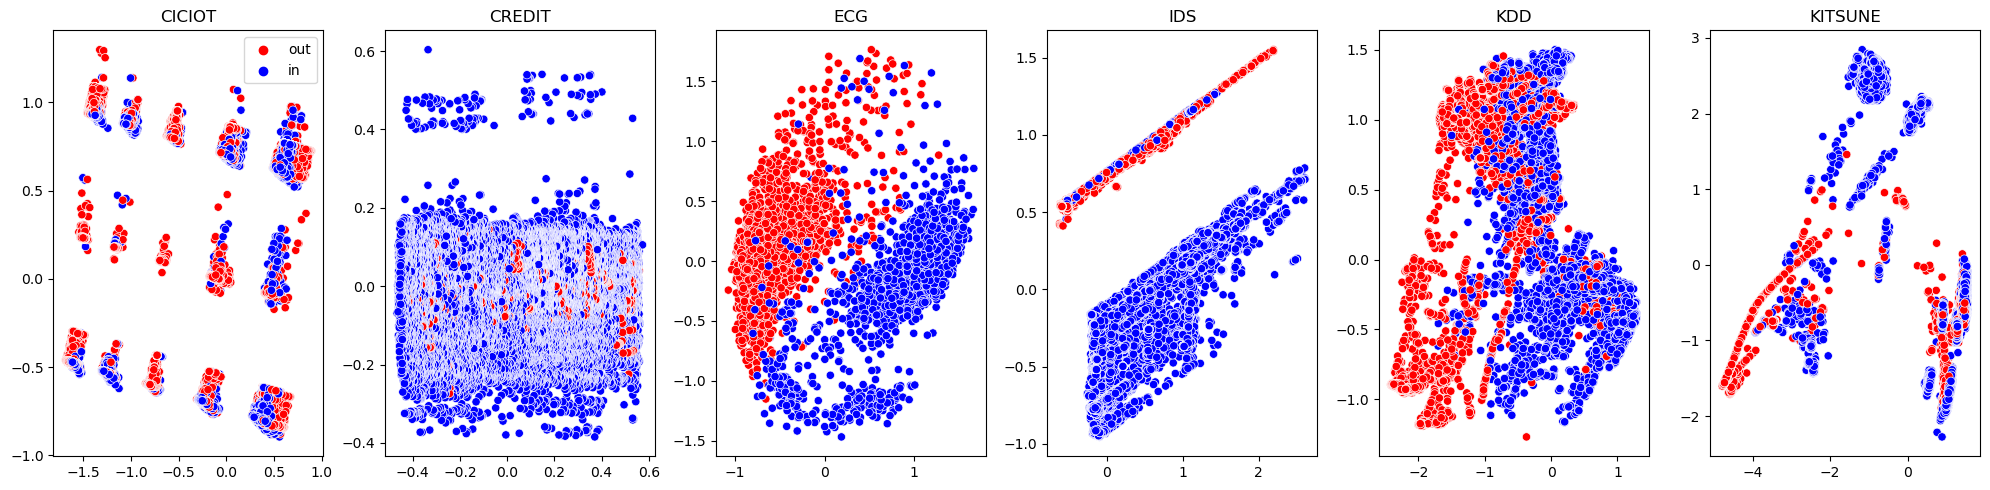

In [53]:

datasets = [data1_ciciot, data1_credit, data1_ecg, data1_ids, data1_kdd, data_kitsune]
pca = PCA(n_components=2)
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
replacement_dict = {
    0: 'in',
    1: 'out',
    2: 'synthetic'
}
for i, xy in enumerate(datasets):
    
    x, y = xy.values[:, :-1], xy.values[:, -1]
    reduced_data = pca.fit_transform(x)
    df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    df_pca['target'] = y
    df_pca['target'] = df_pca['target'].replace(replacement_dict)
    df_pca = df_pca[df_pca['target']!='synthetic']

    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', ax=axs[i], palette={'in':'blue', 'out':'red', 'synthetic':'green'}, legend=(i==0))
    axs[i].set_title(names[i])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    if i == 0:
        axs[i].legend(title='')
    else:
        axs[i].legend([],[], frameon=False)

plt.tight_layout()
plt.savefig("synthetic.png")
plt.show()


In [54]:
def sdc(dynamics):
    return np.std(np.diff(dynamics, axis=1), axis=1)

In [55]:
kdd_1 = np.loadtxt("kdd_FGM_sdc_ae_rate_0.18821442994855225.csv", delimiter=',')
ids_1 = np.loadtxt("ids_FGM_sdc_ae_rate_0.15585998801128825.csv", delimiter=',')
credit_1 = np.loadtxt("credit_FGM_sdc_ae_rate_0.0012223312434517968.csv", delimiter=',')
ecg_1 = np.loadtxt("ecg_FGM_sdc_ae_rate_0.21916092673763307.csv", delimiter=',')
ciciot_1 = np.loadtxt("ciciot_FGM_sdc_ae_rate_0.19310100024086915.csv", delimiter=',')
kitsune_1 = np.loadtxt("kitsune_FGM_sdc_ae_rate_0.0701628076642476.csv", delimiter=',')

In [ ]:
x_kdd, y_kdd = kdd_1[:, :-1], kdd_1[:, -1]
x_ids, y_ids = ids_1[:, :-1], ids_1[:, -1]
x_ciciot, y_ciciot = ciciot_1[:, :-1], ciciot_1[:, -1]
x_kitsune, y_kitsune = kitsune_1[:, :-1], kitsune_1[:, -1]
x_credit, y_credit = credit_1[:, :-1], credit_1[:, -1]
x_ecg, y_ecg = ecg_1[:, :-1], ecg_1[:, -1]

In [ ]:
m = 'score'
mac_kdd = sdc(x_kdd)
mac_ids = sdc(x_ids)
mac_ciciot = sdc(x_ciciot)
mac_kitsune = sdc(x_kitsune)
mac_credit = sdc(x_credit)
mac_ecg = sdc(x_ecg)

In [ ]:
mapping = {0: 'in', 1: 'out', 2:'synthetic'}
def clean(dynamics, target, n=1000):
    detector = IsolationForest(n_estimators=50, random_state=42)
    df = pd.DataFrame(data = dynamics, columns=[m])
    df['class'] = target
    df['class'] = df['class'].replace(mapping)
    y_pred = detector.fit_predict(dynamics.reshape(-1, 1))
    anomaly_scores = detector.decision_function(dynamics.reshape(-1, 1))
    out = anomaly_scores[y_pred==-1]
    in_ = anomaly_scores[y_pred==1]
    threshold = (np.max(out)+np.min(in_))/2
    threshold = np.percentile(out, np.random.randint(60, 70, 1)[0])
    y_pred = anomaly_scores >= threshold

    df[m] = anomaly_scores
    y = y_pred==1
    sample = df.sample(n=n)
    selected = df.index.isin(sample.index)
    cleaned = df[y & selected].copy()
    return sample, cleaned, threshold 

In [ ]:
all_data = [clean(mac_ciciot, y_ciciot), clean(mac_credit, y_credit), 
            clean(mac_ecg, y_ecg), clean(mac_ids, y_ids), 
            clean(mac_kdd, y_kdd), clean(mac_kitsune, y_kitsune)]


In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(9, 3))
datasets = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KISTUNE"]
palette = {"out":"red", "synthetic":"green", "in":"blue"}
for i, df in enumerate(all_data):
    for j in range(1):
        d = df[j]
        d = d.sort_index()
        ax = axes[0, i]
        sns.scatterplot(data=d, x=d.index, y=m, hue='class', ax=ax, palette=palette, s=10)
        ax.axhline(y=df[2], color='r', linestyle='-')
        ax.set_ylabel(None)
        if j==0:
            ax.set_title(datasets[i])
        if i!=0 or j!=1:
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
        
        
        ax.set_xticks([])
        ax = axes[1, i]
        sns.kdeplot(data= d, x='score', hue='class', fill=True, ax=ax, palette=palette)
        ax.legend().remove()
        ax.set_xticks([])
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        if i!=0:
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
        else:
            pass
            #axes[1, 0].set_ylabel('density')
        ax.set_ylim(0, 16)
plt.tight_layout()
plt.savefig("dynamics_space.png")
plt.show()

In [ ]:
d

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
thresholds = [0.008, 0.015, 0.02]
for i, df in enumerate([df_kdd.sample(n=1000), df_ciciot.sample(n=1000), df_kitsune.sample(n=1000)]):
    ax = axes[i]
    sns.scatterplot(data=df, x=df.index, y=m, hue='class', ax=ax, palette=palette)
    ax.set_title(datasets[i])
    ax.axhline(y=thresholds[i], color='r', linestyle='-')
    if i!=0:
        ax.legend().remove()
    ax.set_xticks([])
plt.tight_layout()
plt.savefig("dynamics_space_threshold.png")
plt.show()


    

In [ ]:
x_kdd.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: 6 sequence matrices with three categories
num_matrices = 6
num_sequences = 100
sequence_length = 50
num_categories = 3

sequences = [x_ciciot, x_credit, x_ecg, x_ids, x_kdd, x_kitsune]
labels = [y_ciciot, y_credit, y_ecg, y_ids, y_kdd, y_kitsune]
colors = ['blue', 'red', 'green']
names = ['in', 'out', 'synthetic']
databases = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KITSUNE"]
fig, axs = plt.subplots(1, 6, figsize=(9, 2), sharex=True)
sequence_length = 10
for i in range(6):
    seq = sequences[i]
    lab = labels[i]
    for j in range(3):
        cat_sequences = seq[lab == j]
        mean_sequence = np.mean(cat_sequences, axis=0)
        std_sequence = np.std(cat_sequences, axis=0)
        axs[i].plot(mean_sequence, color=colors[j], label=names[j])
        axs[i].fill_between(range(sequence_length), mean_sequence - std_sequence, mean_sequence + std_sequence, color=colors[j], alpha=0.2)
        #axs[i].set_title(databases[i])



plt.tight_layout()
plt.savefig("dynamics_space_two.png")
plt.show()
